# Load Data

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('data_processed.csv', encoding='latin-1')
data.head()

drummer                session                        id          style  \
0  drummer1  drummer1/eval_session   drummer1/eval_session/1   funk/groove1   
1  drummer1  drummer1/eval_session  drummer1/eval_session/10  soul/groove10   
2  drummer1  drummer1/eval_session   drummer1/eval_session/2   funk/groove2   
3  drummer1  drummer1/eval_session   drummer1/eval_session/3   soul/groove3   
4  drummer1  drummer1/eval_session   drummer1/eval_session/4   soul/groove4   

   bpm  beat_type time_signature  \
0  138          1            4-4   
1  102          1            4-4   
2  105          1            4-4   
3   86          1            4-4   
4   80          1            4-4   

                                       midi_filename  \
0  drummer1/eval_session/1_funk-groove1_138_beat_...   
1  drummer1/eval_session/10_soul-groove10_102_bea...   
2  drummer1/eval_session/2_funk-groove2_105_beat_...   
3  drummer1/eval_session/3_soul-groove3_86_beat_4...   
4  drummer1/eval_session/4_soul-groove4_80_beat_4...   

                                      audio_filename   duration  ...  \
0  drummer1/eval_session/1_funk-groove1_138_beat_...  27.872308  ...   
1  drummer1/eval_session/10_soul-groove10_102_bea...  37.691158  ...   
2  drummer1/eval_session/2_funk-groove2_105_beat_...  36.351218  ...   
3  drummer1/eval_session/3_soul-groove3_86_beat_4...  44.716543  ...   
4  drummer1/eval_session/4_soul-groove4_80_beat_4...  47.987500  ...   

  sambareggae  sangueo  secondline  shuffle  slow  soft  songo  soul  swing  \
0           0        0           0        0     0     0      0     0      0   
1           0        0           0        0     0     0      0     1      0   
2           0        0           0        0     0     0      0     0      0   
3           0        0           0        0     0     0      0     1      0   
4           0        0           0        0     0     0      0     1      0   

   venezuelan  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 100 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 100 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   drummer                  1090 non-null   object 
 1   session                  1090 non-null   object 
 2   id                       1090 non-null   object 
 3   style                    1090 non-null   object 
 4   bpm                      1090 non-null   int64  
 5   beat_type                1090 non-null   int64  
 6   time_signature           1090 non-null   object 
 7   midi_filename            1090 non-null   object 
 8   audio_filename           1090 non-null   object 
 9   duration                 1090 non-null   float64
 10  split                    1090 non-null   object 
 11  onset_env_mean           1090 non-null   float64
 12  onset_env_std            1090 non-null   float64
 13  mfcc_mean                1090 non-null   float64
 14  mfcc_std               

# Split labels and features

In [5]:
data.iloc[:, 31:]

afrobeat  afrocuban  ando  baiao  bembe  blues  bomba  bossa  brazilian  \
0            0          0     0      0      0      0      0      0          0   
1            0          0     0      0      0      0      0      0          0   
2            0          0     0      0      0      0      0      0          0   
3            0          0     0      0      0      0      0      0          0   
4            0          0     0      0      0      0      0      0          0   
...        ...        ...   ...    ...    ...    ...    ...    ...        ...   
1085         0          0     0      0      0      0      0      0          0   
1086         0          0     0      0      0      0      0      0          0   
1087         0          0     0      0      0      0      0      0          0   
1088         0          0     0      0      0      0      0      0          0   
1089         0          0     0      0      0      0      0      0          0   

      breakbeat  ...  sambareggae  sangueo  secondline  shuffle  slow  soft  \
0             0  ...            0        0           0        0     0     0   
1             0  ...            0        0           0        0     0     0   
2             0  ...            0        0           0        0     0     0   
3             0  ...            0        0           0        0     0     0   
4             0  ...            0        0           0        0     0     0   
...         ...  ...          ...      ...         ...      ...   ...   ...   
1085          0  ...            0        0           0        0     0     0   
1086          0  ...            0        0           0        0     0     0   
1087          0  ...            0        0           0        0     0     0   
1088          0  ...            0        0           0        0     0     0   
1089          0  ...            0        0           0        0     0     0   

      songo  soul  swing  venezuelan  
0         0     0      0           0  
1         0     1      0           0  
2         0     0      0           0  
3         0     1      0           0  
4         0     1      0           0  
...     ...   ...    ...         ...  
1085      0     0      0           0  
1086      0     0      0           0  
1087      0     0      0           0  
1088      0     0      0           0  
1089      0     0      0           0  

[1090 rows x 69 columns]

In [6]:
data.columns

Index(['drummer', 'session', 'id', 'style', 'bpm', 'beat_type',
       'time_signature', 'midi_filename', 'audio_filename', 'duration',
       'split', 'onset_env_mean', 'onset_env_std', 'mfcc_mean', 'mfcc_std',
       'spectral_flux_mean', 'spectral_flux_std', 'spectral_contrast_mean',
       'spectral_contrast_std', 'tonnetz_mean', 'tonnetz_std', 'rms_mean',
       'rms_std', 'spectral_centroid_mean', 'spectral_centroid_std',
       'spectral_bandwidth_mean', 'spectral_bandwidth_std',
       'spectral_flatness_mean', 'spectral_flatness_std', 'tempogram_mean',
       'tempogram_std', 'afrobeat', 'afrocuban', 'ando', 'baiao', 'bembe',
       'blues', 'bomba', 'bossa', 'brazilian', 'breakbeat', 'calypso',
       'chacarera', 'chacha', 'country', 'dance', 'disco', 'dominican', 'fast',
       'folk', 'frevo', 'funk', 'fusion', 'gospel', 'groove1', 'groove10',
       'groove2', 'groove3', 'groove4', 'groove5', 'groove6', 'groove7',
       'groove8', 'groove9', 'halftime', 'hiphop', 'ijexa'

In [7]:
# seperate labels
y = data.iloc[:, 31:]
# seperate data
X = data.iloc[:, :31]
# drop unnecessary data
X = X.drop(columns=["drummer", "session", "id", "midi_filename", "audio_filename", "style", "split"])
# time signature would be a nice feature, but they are 99% in 4/4. We might as well drop this column to pevent overfitting
X = X.drop(columns=["time_signature"])
# The model should be able to predict a genre independent of duration so it should be dropped.
# But duration also is an influence in some of the extracted audio features too. So i'm unsure if this could be benefcial to the interpretation of the extracted audio features.
# lets keep it for now
#X = X.drop(columns=["duration"])

In [8]:
# only labels
y.head()

afrobeat  afrocuban  ando  baiao  bembe  blues  bomba  bossa  brazilian  \
0         0          0     0      0      0      0      0      0          0   
1         0          0     0      0      0      0      0      0          0   
2         0          0     0      0      0      0      0      0          0   
3         0          0     0      0      0      0      0      0          0   
4         0          0     0      0      0      0      0      0          0   

   breakbeat  ...  sambareggae  sangueo  secondline  shuffle  slow  soft  \
0          0  ...            0        0           0        0     0     0   
1          0  ...            0        0           0        0     0     0   
2          0  ...            0        0           0        0     0     0   
3          0  ...            0        0           0        0     0     0   
4          0  ...            0        0           0        0     0     0   

   songo  soul  swing  venezuelan  
0      0     0      0           0  
1      0     1      0           0  
2      0     0      0           0  
3      0     1      0           0  
4      0     1      0           0  

[5 rows x 69 columns]

In [9]:
# only features
X.head()

bpm  beat_type   duration  onset_env_mean  onset_env_std  mfcc_mean  \
0  138          1  27.872308        0.820465       1.471963 -14.319676   
1  102          1  37.691158        0.673516       1.996858 -18.866692   
2  105          1  36.351218        0.807532       1.771858 -15.552315   
3   86          1  44.716543        0.714612       1.739458 -18.966784   
4   80          1  47.987500        0.617521       1.897261 -21.551086   

    mfcc_std  spectral_flux_mean  spectral_flux_std  spectral_contrast_mean  \
0  73.690796            0.370578           0.803874               10.217504   
1  81.949180            0.318956           0.836129                9.389001   
2  76.598114            0.430627           0.986051                9.708105   
3  91.778990            0.261665           0.707281                9.359258   
4  84.417250            0.230317           0.718205                9.491370   

   ...  rms_mean   rms_std  spectral_centroid_mean  spectral_centroid_std  \
0  ...  0.034636  0.058105             5335.603726            2688.930490   
1  ...  0.030456  0.063953             6338.191486            3683.342441   
2  ...  0.037484  0.067771             6077.338238            3792.722720   
3  ...  0.022330  0.049949             5542.225095            3417.495525   
4  ...  0.021056  0.051182             7714.574395            3887.263988   

   spectral_bandwidth_mean  spectral_bandwidth_std  spectral_flatness_mean  \
0              4615.955290             1007.859698                0.092827   
1              4989.509117             1157.665970                0.142638   
2              4680.404598             1377.311199                0.124579   
3              4875.089779             1265.250954                0.106046   
4              5119.254721             1091.703500                0.188627   

   spectral_flatness_std  tempogram_mean  tempogram_std  
0               0.133516        0.239535       0.137067  
1               0.155706        0.139604       0.163539  
2               0.146646        0.179192       0.130047  
3               0.138443        0.208746       0.174764  
4               0.157474        0.129188       0.149107  

[5 rows x 23 columns]

In [10]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [11]:
import pickle
import os

path_data = 'datasets'

def grid_search_pickling_path(prefix: str, dictionary: dict):
    dict_string = str(dictionary).replace(":", "").replace("'", "").replace("{", "").replace("}", "").replace(" ", "")
    filename = f'{prefix}_grid_search-{dict_string}.pkl'
    return os.path.join(path_data, filename)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV

def perform_and_plot_RNDForest_grid_search(parameters: dict, train_data, train_labels):
    filepath = grid_search_pickling_path("random_forest", parameters)
    try:
        with open(filepath, 'rb') as file:
            grid_search = pickle.load(file)
        print(f"Loaded GridSearchCV from {filepath}\n with best params: {grid_search.best_params_}")
    except:
        print(f"Found no GridSearchCV at {filepath}. Calculating...")

        model = RandomForestClassifier(random_state=42)
        # Wrap with MultiOutputClassifier
        multi_target_rf = MultiOutputClassifier(model, n_jobs=-1)
        
        # Perform grid search
        grid_search = GridSearchCV(multi_target_rf, parameters, verbose=0, scoring='accuracy', cv=5)
        grid_search.fit(train_data, train_labels)
        
        with open(filepath, 'wb') as file:
            pickle.dump(grid_search, file)
    
    # Collect grid search results
    cv_results = grid_search.cv_results_
    mean_test_scores = cv_results['mean_test_score']
    params = cv_results['params']

    # Prepare data for plotting
    # Prepare data for plotting
    scores_array = np.array(mean_test_scores).reshape(
        len(parameters['estimator__max_depth']),
        len(parameters['estimator__min_samples_leaf']),
        len(parameters['estimator__n_estimators'])
    )

    # Create a line plot for each n_estimators
    fig, ax = plt.subplots(figsize=(10, 6))

    for k, n_estimators in enumerate(parameters['estimator__n_estimators']):
        scores_for_n_estimators = scores_array[:, :, k].T
        for i, min_samples_leaf in enumerate(parameters['estimator__min_samples_leaf']):
            ax.plot(parameters['estimator__max_depth'], scores_for_n_estimators[i],
                    marker='o', linestyle='--', label=f'n_estimators: {n_estimators}, min_samples_leaf: {min_samples_leaf}')

    ax.set_title('Grid Search Results')
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('Mean Test Score')
    ax.legend(loc='best')

    plt.show()
    
    return grid_search

# # Example usage
# parameters = {
#     'estimator__max_depth': [1, 2],
#     'estimator__min_samples_leaf': [2, 4],
#     'estimator__n_estimators': [3, 5, 10]
# }

# # Assume X_train and y_train are your training data and labels
# grid_search_result = perform_and_plot_RNDForest_grid_search(parameters, X_train, y_train)


In [13]:
n_estimators = 10
max_depth = 10
min_samples_leaf = 2

In [14]:
# Initialize the base classifier
random_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=10,
                       random_state=42)

### Evaluation

In [15]:
y_pred = random_forest.predict(X_test)

#### metrics

In [16]:
from sklearn.metrics import classification_report, hamming_loss
import seaborn as sns

def evaluate_model(model, X_validation, y_validation):
    y_predicted = model.predict(X_validation)
    
    print("Classification Report:")
    print(classification_report(y_validation, y_predicted, target_names=y.columns))
    
    print("\nHamming Loss:", hamming_loss(y_validation, y_predicted))

In [17]:
evaluate_model(random_forest, X_test, y_test)

Classification Report:
               precision    recall  f1-score   support

     afrobeat       0.00      0.00      0.00         0
    afrocuban       1.00      0.31      0.48        16
         ando       0.00      0.00      0.00         0
        baiao       1.00      0.14      0.25         7
        bembe       1.00      0.50      0.67         8
        blues       0.00      0.00      0.00         1
        bomba       0.00      0.00      0.00         1
        bossa       0.00      0.00      0.00         0
    brazilian       0.50      0.11      0.18         9
    breakbeat       0.00      0.00      0.00         0
      calypso       0.00      0.00      0.00         0
    chacarera       0.00      0.00      0.00         1
       chacha       0.00      0.00      0.00         0
      country       0.00      0.00      0.00         4
        dance       0.00      0.00      0.00         1
        disco       0.00      0.00      0.00         1
    dominican       0.00      0.00      0

d:\Programmierung\anaconda3\envs\audio_data_science_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Programmierung\anaconda3\envs\audio_data_science_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Programmierung\anaconda3\envs\audio_data_science_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

#### feature importance

In [18]:
# create a dataframe with the name of a feature and its feature importance
def get_feature_importance_df(model, X):
    feature_importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
    return feature_importance_df

get_feature_importance_df(random_forest, X_train)

Feature  Importance
0                       bpm    0.159948
2                  duration    0.091132
10    spectral_contrast_std    0.053716
8         spectral_flux_std    0.051929
13                 rms_mean    0.050679
14                  rms_std    0.047240
5                 mfcc_mean    0.041598
18   spectral_bandwidth_std    0.040540
9    spectral_contrast_mean    0.039229
6                  mfcc_std    0.037801
3            onset_env_mean    0.034813
7        spectral_flux_mean    0.033588
15   spectral_centroid_mean    0.032544
17  spectral_bandwidth_mean    0.032433
12              tonnetz_std    0.031927
20    spectral_flatness_std    0.030729
21           tempogram_mean    0.030493
4             onset_env_std    0.030033
16    spectral_centroid_std    0.029165
11             tonnetz_mean    0.029140
22            tempogram_std    0.027580
19   spectral_flatness_mean    0.026089
1                 beat_type    0.017655

#### confusion matrices

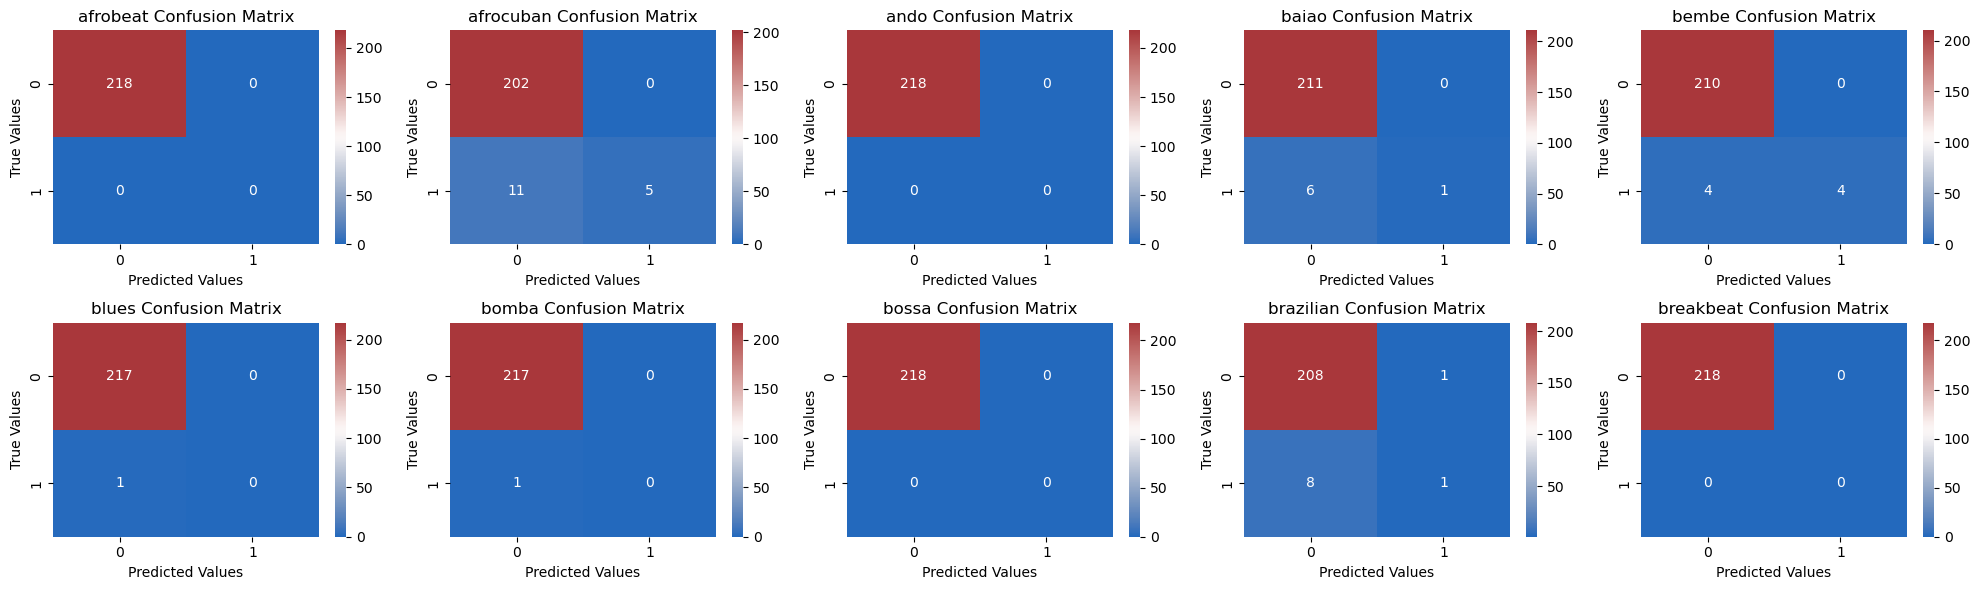

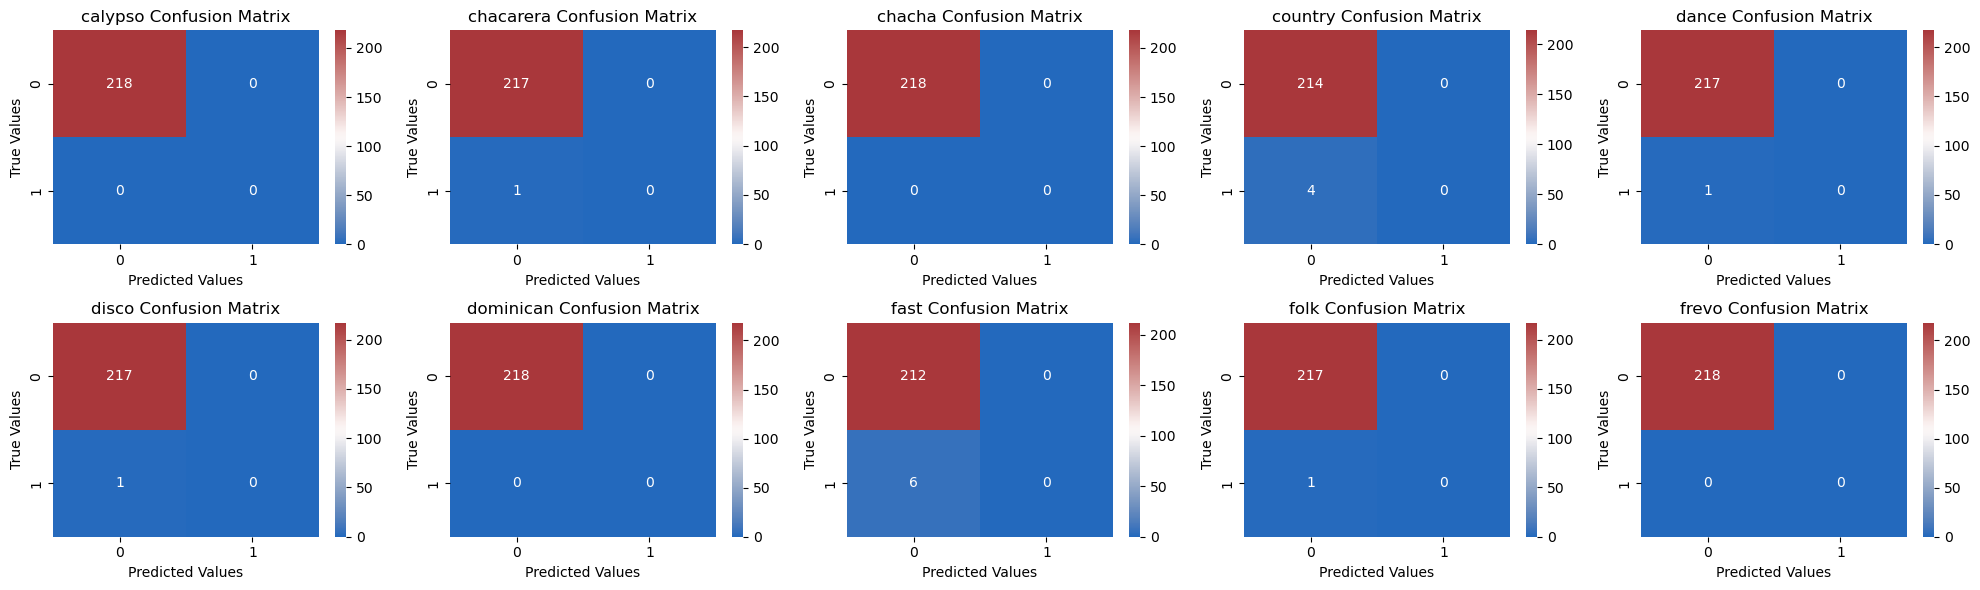

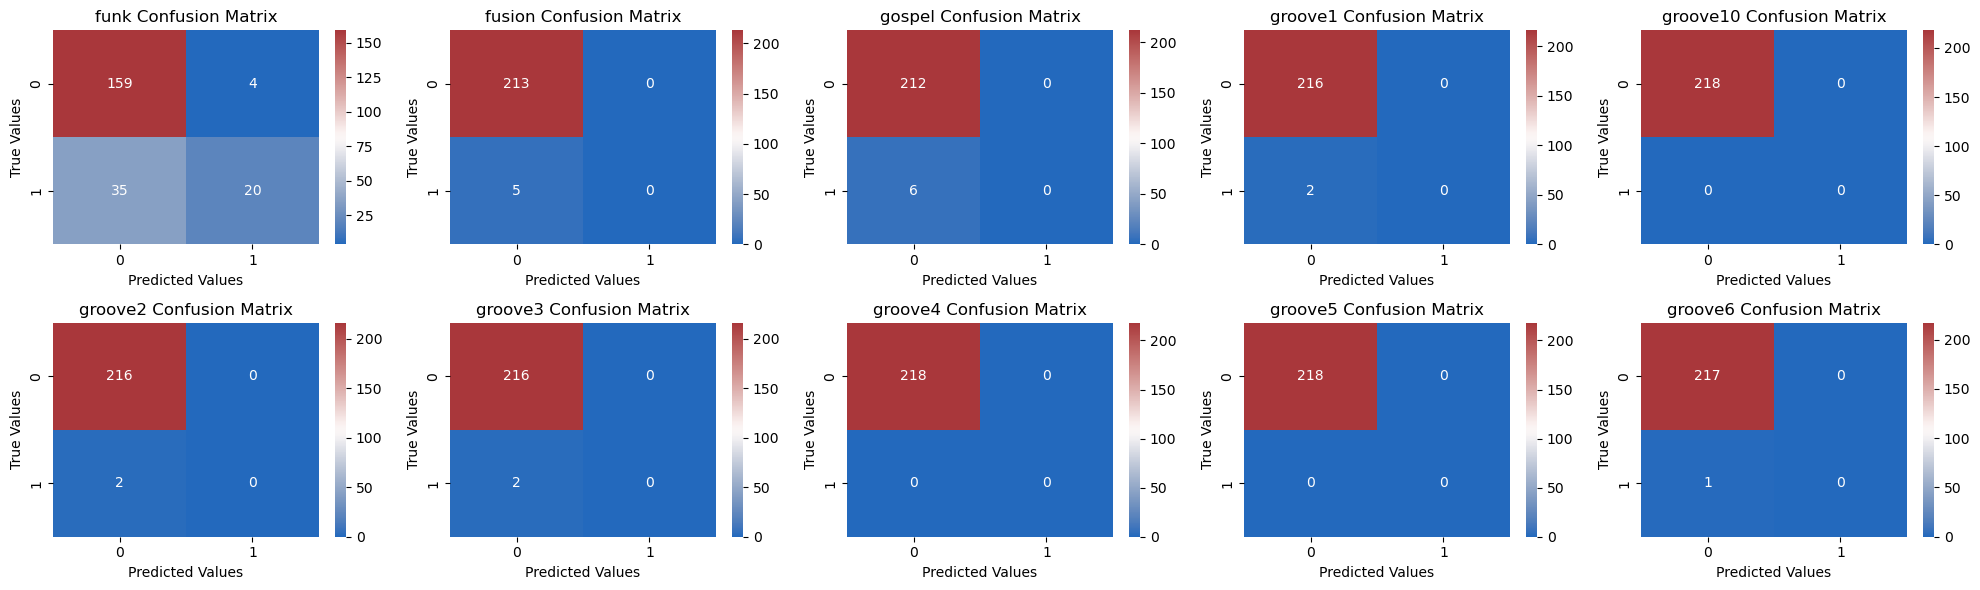

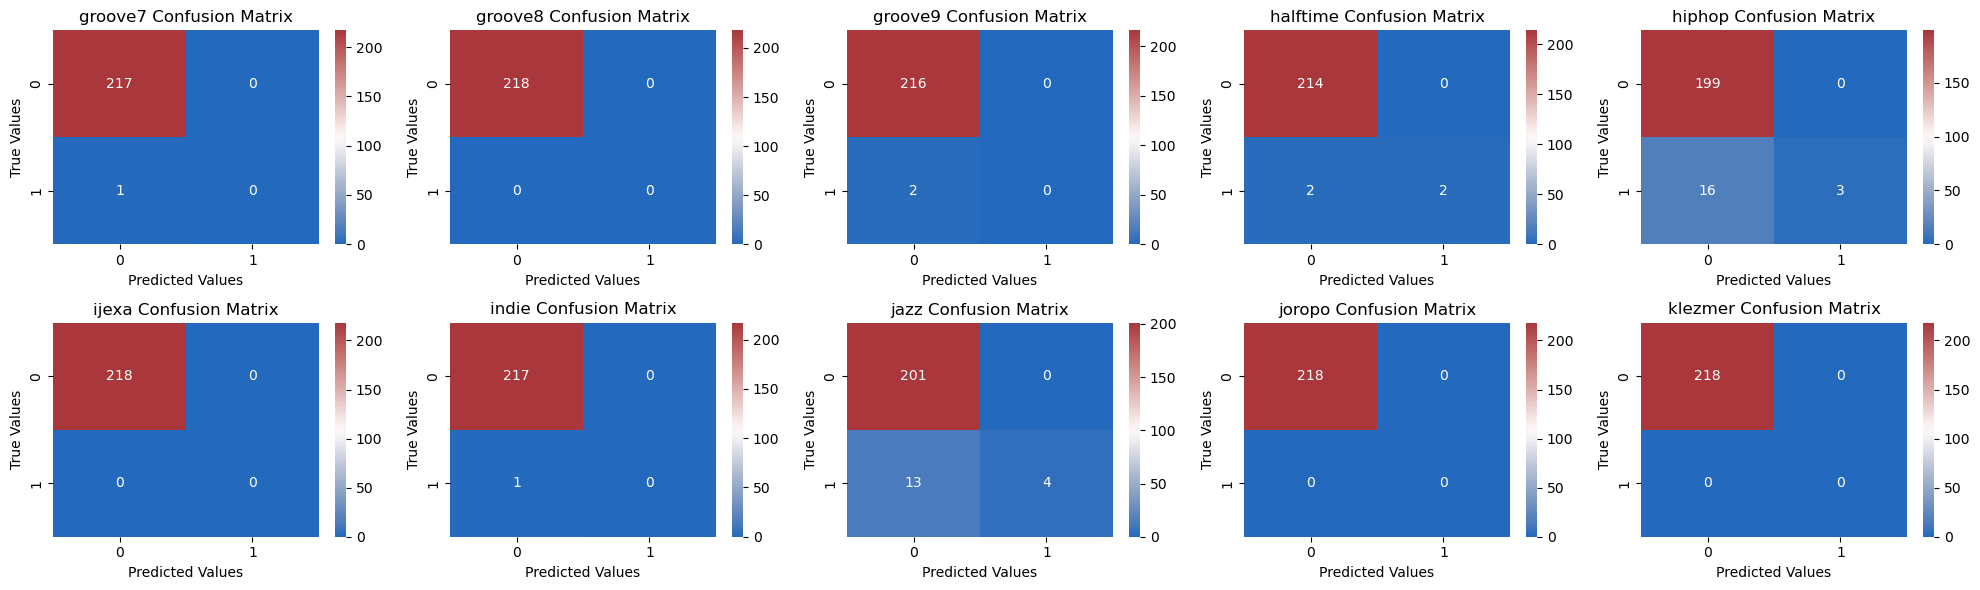

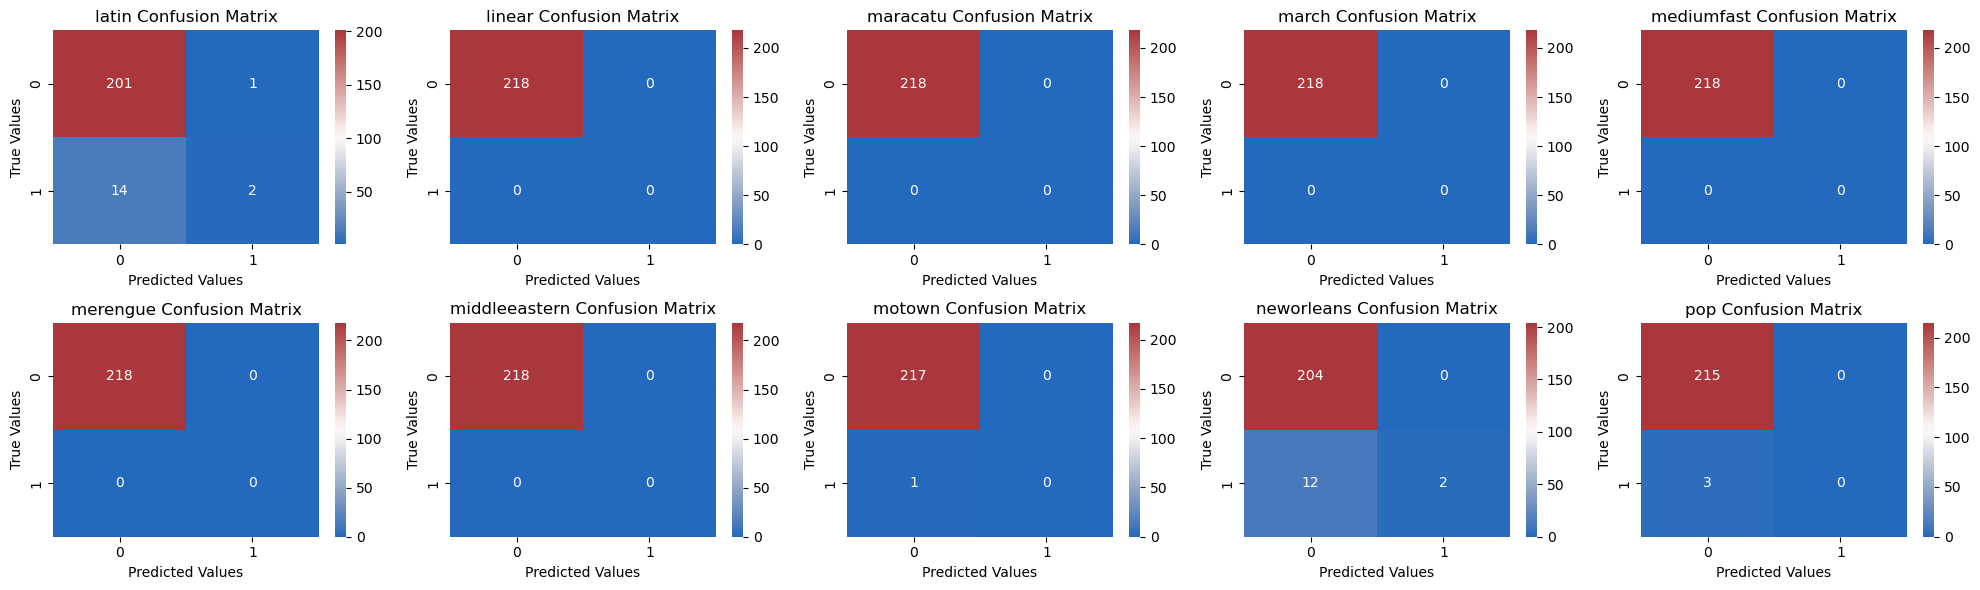

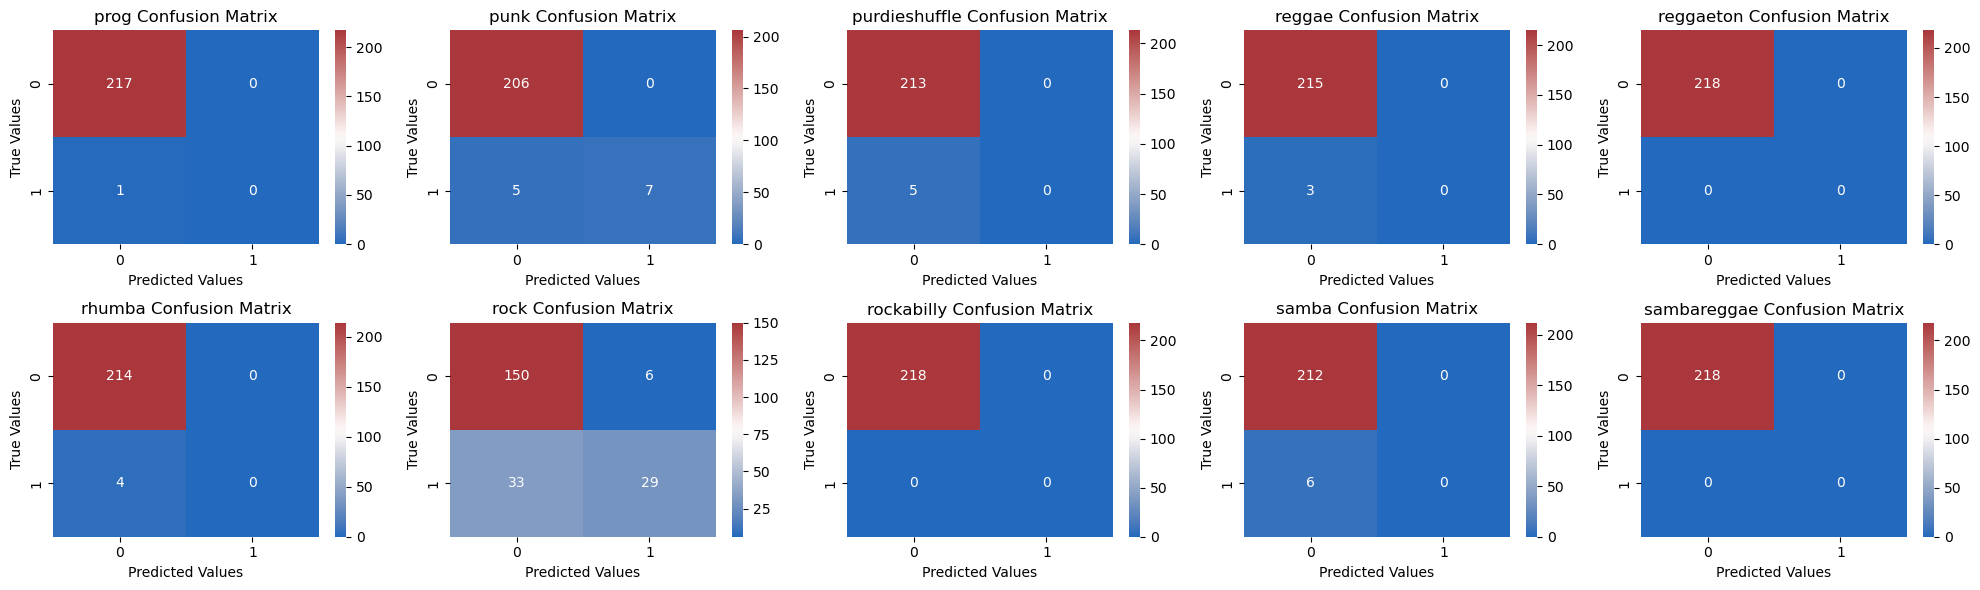

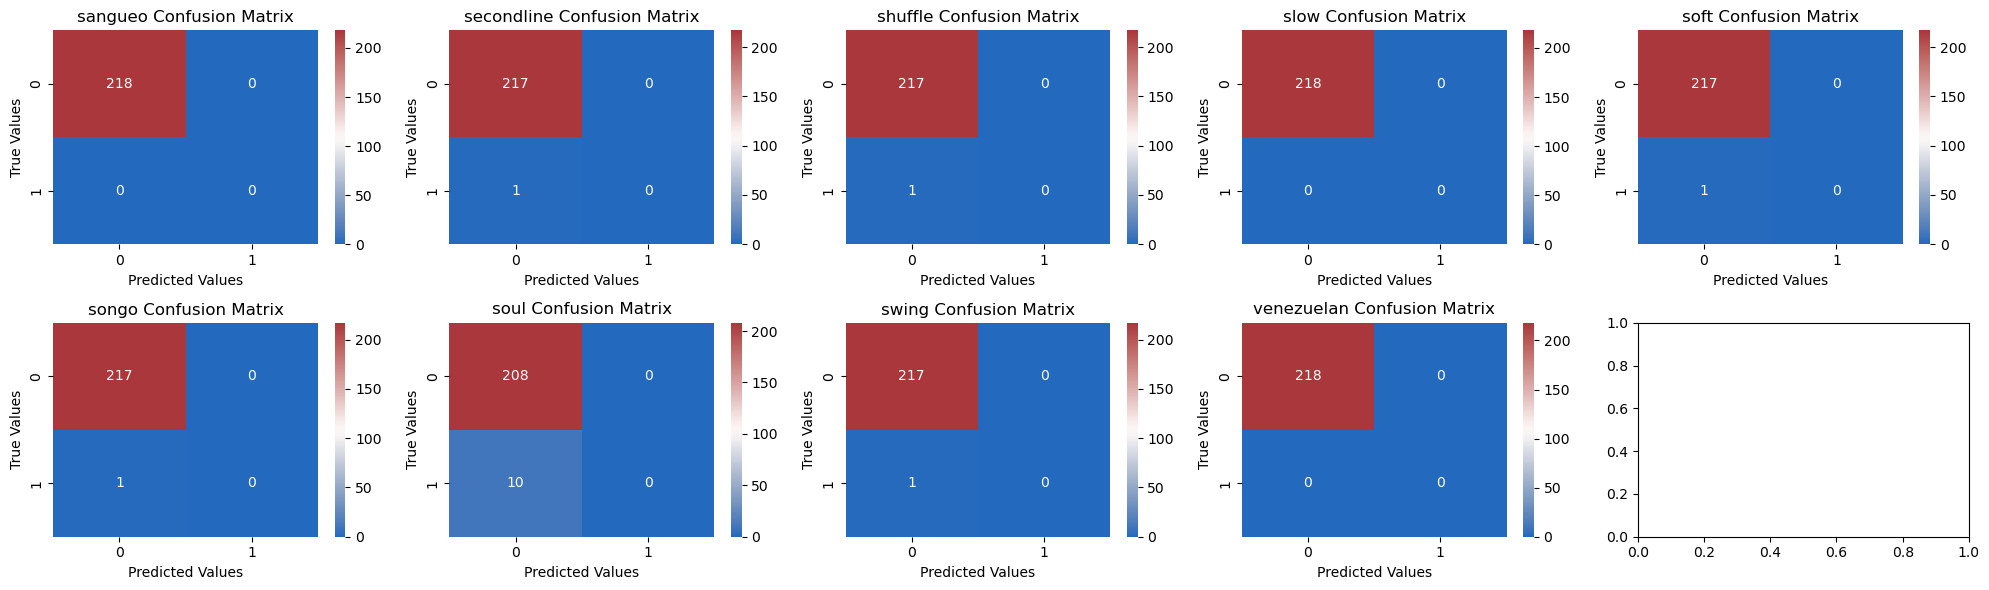

In [19]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(conf_matrix, labels, selected_labels):
    fig, ax = plt.subplots(2, 5, figsize=(20, 6))
    for axes, label in zip(ax.flatten(), selected_labels):
        matrix = conf_matrix[labels.index(label)]
        sns.heatmap(matrix, annot=True, ax=axes, fmt='d', cmap='vlag')
        axes.set_title(f'{label} Confusion Matrix')
        axes.set_xlabel('Predicted Values')
        axes.set_ylabel('True Values')
    plt.tight_layout()
    plt.show()

y_pred = random_forest.predict(X_test)
multi_conf_matrix = multilabel_confusion_matrix(y_test, y_pred)
plot_confusion_matrix(multi_conf_matrix, list(y.columns), y.columns[:10])
plot_confusion_matrix(multi_conf_matrix, list(y.columns), y.columns[10:20])
plot_confusion_matrix(multi_conf_matrix, list(y.columns), y.columns[20:30])
plot_confusion_matrix(multi_conf_matrix, list(y.columns), y.columns[30:40])
plot_confusion_matrix(multi_conf_matrix, list(y.columns), y.columns[40:50])
plot_confusion_matrix(multi_conf_matrix, list(y.columns), y.columns[50:60])
plot_confusion_matrix(multi_conf_matrix, list(y.columns), y.columns[60:69])

#### tabular evaluation

In [21]:
y_pred_df = pd.DataFrame(y_pred, columns=y.columns)

In [22]:
y_pred_df["predicted genres"] = ""

for genre in y.columns:
    # create a mask to select ever sample of that genre
    predicted_mask = y_pred_df[genre] == 1
    actual_mask = y_test[genre] == 1
    # write the genre of the sample to a new column called genre
    y_pred_df.loc[predicted_mask, "predicted genres"] += genre + ", "

# output the dataframe with the genre column
y_pred_df["predicted genres"].value_counts()

predicted genres
                             139
rock,                         32
funk,                         20
punk,                          7
afrocuban, bembe,              4
jazz,                          3
hiphop,                        3
halftime, rock,                2
funk, neworleans,              2
baiao, brazilian, latin,       1
funk, rock,                    1
latin,                         1
afrocuban,                     1
funk, jazz,                    1
brazilian, latin,              1
Name: count, dtype: int64

In [23]:
# Reset the index of both dataframes
y_pred_df = y_pred_df.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Initialize the column with empty strings
y_pred_df["actual genres"] = ""

for genre in y.columns:
    # create a mask to select ever sample of that genre
    actual_mask = y_test[genre] == 1
    # append the genre of the sample to the "actual genres" column
    y_pred_df.loc[actual_mask, "actual genres"] += genre + ", "

In [24]:
pd.set_option('display.max_rows', 80)
y_pred_df[["predicted genres", "actual genres"]][y_pred_df["predicted genres"] != ""]

predicted genres              actual genres
4                       rock,                    hiphop, 
7                       funk,       funk, purdieshuffle, 
8                       funk,                funk, rock, 
11                      rock,                      rock, 
13                      funk,                fast, funk, 
14                      rock,          funk, neworleans, 
16                      punk,                      punk, 
19          afrocuban, bembe,          afrocuban, bembe, 
21                      rock,                      rock, 
22                      rock,                      rock, 
23                      funk,              latin, samba, 
24                      rock,                      rock, 
25                      jazz,                      jazz, 
30   baiao, brazilian, latin,   baiao, brazilian, latin, 
32            halftime, rock,            halftime, rock, 
33                      punk,                      punk, 
49                      rock,            halftime, rock, 
50                      rock,                      rock, 
51                      rock,                      rock, 
53                      funk,                fast, funk, 
58                      funk,          funk, neworleans, 
62                      punk,                      punk, 
63                      rock,                      rock, 
65                    hiphop,                    hiphop, 
68          funk, neworleans,          funk, neworleans, 
78                      rock,              fusion, jazz, 
79                      rock,                      rock, 
80                      funk,          funk, neworleans, 
81                      rock,                    hiphop, 
82                      jazz,                      jazz, 
85                      rock,                      rock, 
87                      jazz,               jazz, swing, 
89                      rock,                      rock, 
91                      funk,                fast, funk, 
94                      rock,                      rock, 
98          funk, neworleans,          funk, neworleans, 
103                     funk,                      soul, 
109                     rock,                      rock, 
110                   hiphop,                    hiphop, 
112                     rock,                      rock, 
115                     rock,                      rock, 
125                     funk,                      funk, 
131                   hiphop,                    hiphop, 
132               funk, rock,                funk, rock, 
133                     rock,                      rock, 
137                     rock,                      rock, 
139                     rock,                      rock, 
141                     punk,                      punk, 
148                     punk,                      punk, 
149                    latin,   baiao, brazilian, latin, 
151                     rock,                      rock, 
152                afrocuban,         afrocuban, rhumba, 
153                     funk,       funk, purdieshuffle, 
155                     funk,          funk, neworleans, 
157                     funk,                      funk, 
158                     rock,                      rock, 
159           halftime, rock,            halftime, rock, 
160                     funk,                fast, funk, 
167                     rock,             groove3, soul, 
168         afrocuban, bembe,          afrocuban, bembe, 
171                     rock,                      rock, 
172                     rock,              fusion, jazz, 
175                     funk,                fast, funk, 
176                     funk,   baiao, brazilian, latin, 
180                     funk,       funk, purdieshuffle, 
181                     rock,                      rock, 
182                     rock,                folk, rock, 
185         afrocuban, bembe,          afrocuban, bembe, 
187         

#### an actual tree, wow

In [25]:
# plot a tree in the forest
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(200, 100))
plot_tree(random_forest.estimators_[0], ax=ax)
plt.show()

#### shap

https://stackoverflow.com/questions/65549588/shap-treeexplainer-for-randomforest-multiclass-what-is-shap-valuesi

In [26]:
import shap

In [27]:
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_test)[1]
shap.summary_plot(shap_values, X_test)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from shap import TreeExplainer
from shap import summary_plot

X, y = make_classification(1000, 100, n_informative=8, n_classes=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)

clf = RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(X_train, y_train)
explainer = TreeExplainer(clf)
shap_values = np.array(explainer.shap_values(X_train))
print(shap_values.shape)

explainer = shap.TreeExplainer(clf)
shap_values = np.array(explainer.shap_values(X_train))
print(shap_values.shape)

shap_values = np.array(explainer.shap_values(X_train))
shap_values_ = shap_values.transpose((1,0,2))
print(shap_values[3].shape)

shap_values_ = shap_values.transpose((1,0,2))
print(np.allclose(
    clf.predict_proba(X_train),
    shap_values_.sum(2) + explainer.expected_value
))

shap.summary_plot(shap_values[0],X_train)

(750, 100)
(750, 100, 10)
(750, 100, 10)
(100, 10)


ValueError: operands could not be broadcast together with shapes (100,750) (10,) 

 98%|===================| 29456/30084 [00:33<00:00]        

IndexError: index 112 is out of bounds for axis 1 with size 23

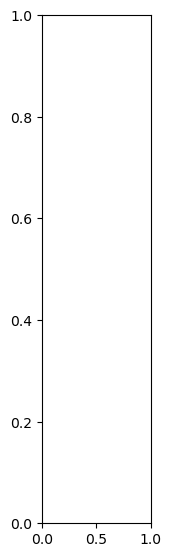

In [ ]:
# plot the SHAP values for the random forest model
explainer = shap.TreeExplainer(random_forest, X_test)

shap.summary_plot(explainer(X_test), X_test, plot_type='bar')

IndexError: index 112 is out of bounds for axis 1 with size 23

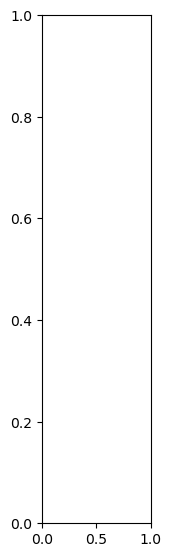

In [ ]:
# plot the SHAP values for the random forest model
explainer = shap.TreeExplainer(random_forest)

shap.summary_plot(explainer.shap_values(X_train), X_train, plot_type='bar')

In [ ]:
rf_explainer = shap.Explainer(random_forest)
rf_explainer.expected_value = rf_explainer.expected_value[0]  # Additional line to force the dim of base_values
rf_shap_values = rf_explainer(X_test)
shap.plots.beeswarm(rf_shap_values[:,"RM"], color=rf_shap_values)

IndexError: invalid index to scalar variable.